In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import plotly.express as px
import pandas as pd
import json
import pickle
import plotly.graph_objects as go  # Ensure graph_objects is imported

# Block Time


In [30]:
# Source of data: https://aspm.faa.gov/apm/sys/AnalysisCP.asp
# For Detail information: https://aspm.faa.gov/aspmhelp/index/ASPM_City_Pair_Analysis__Definitions_of_Variables.html
# We choose departure as major five airports in Tennessee and arrivals are all the airports
df=pd.read_excel("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Time/APM-Report-2022.xlsx")
df.head()

,Departure,Arrival,Date,Departure Hour,Arrival Hour,GMT Departure Hour,GMT Arrival Hour,Flight Count,Average Scheduled Block Time,Average Actual Block Time,Average Block Time Delay,Average Taxi Out Time,Average Taxi Out Time.1,Average Optimal Block Time,Percent On Time,Average Arrival Delay,Average Estimated Time Enroute,Average Actual Time Enroute,Average Airborne Delay
0,BNA,05C,01/12/2022,13,14,19,20,1,70,75,5.0,15,5,70,100.0,10.0,55,61,6.0
1,BNA,0A9,01/23/2022,8,9,14,14,1,59,62,3.0,10,5,59,100.0,0.0,44,42,0.0
2,BNA,0A9,02/27/2022,8,10,14,15,1,45,51,6.0,18,5,45,100.0,12.0,30,33,3.0
3,BNA,0A9,04/02/2022,11,13,16,17,1,57,56,0.0,12,5,57,0.0,39.0,42,36,0.0
4,BNA,0A9,04/05/2022,10,11,15,15,1,56,48,0.0,10,5,56,100.0,0.0,41,41,0.0


In [31]:
# Importing file containing all the  airports list
df_airports=pd.read_excel("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/airport-codes.xlsx")
df_airports

,City name,Airport Code,Airport Name,Country name,Country Abbrev.,World Area Code
0,NaN,NaN,NaN,NaN,NaN,NaN
1,108 Mile Ranch,ZMH,108 Mile Ranch,Canada,CA,906
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Aachen,AAH,Aachen/Merzbruck,Germany,DE,429
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
20217,Pittsburgh,PIT,Pittsburgh International Airport,United States,US,67
20218,NaN,NaN,NaN,NaN,NaN,NaN
20219,Kinshasa,FIH,N’Djili Airport,D. R. .Congo (Zaire),CD,517
20220,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Selecting the airports of US only
selected_rows = df_airports[df_airports['Country Abbrev.'] == 'US']
selected_rows

,City name,Airport Code,Airport Name,Country name,Country Abbrev.,World Area Code
41,Aberdeen,APG,Phillips AAF,United States,US,67
43,Aberdeen,ABR,Municipal,United States,US,67
49,Abilene,DYS,Dyess AFB,United States,US,67
51,Abilene,ABI,Municipal,United States,US,67
57,Abingdon,VJI,Virginia Highlands,United States,US,67
...,...,...,...,...,...,...
20181,Allentown,ABE,Lehigh Valley International,United States,US,67
20187,Buffalo,BUF,Buffalo Niagara International,United States,US,0
20201,Hendersonville,0A7,Hendersonville Airport,United States,US,67
20213,New Orleans,MSY,Louis Armstrong New Orleans International Airport,United States,US,67


In [33]:
# Selecting all the airport code in an array
airport_codes = selected_rows['Airport Code'].values

# Alternatively, you can use to_numpy() method, which is more explicit
# airport_codes = selected_rows['Airport Code'].to_numpy()

airport_codes

array(['APG', 'ABR', 'DYS', ..., '0A7', 'MSY', 'PIT'], dtype=object)

In [34]:
df_final = df[df['Arrival'].isin(airport_codes)]
df_final

,Departure,Arrival,Date,Departure Hour,Arrival Hour,GMT Departure Hour,GMT Arrival Hour,Flight Count,Average Scheduled Block Time,Average Actual Block Time,Average Block Time Delay,Average Taxi Out Time,Average Taxi Out Time.1,Average Optimal Block Time,Percent On Time,Average Arrival Delay,Average Estimated Time Enroute,Average Actual Time Enroute,Average Airborne Delay
49,BNA,AAF,03/08/2022,13,15,19,20,1,90,87,0.0,21,5,90,100.0,6.0,75,70,0.0
50,BNA,AAF,04/17/2022,9,11,14,15,1,72,80,8.0,14,5,72,100.0,9.0,57,62,5.0
51,BNA,AAF,04/20/2022,16,19,21,23,1,106,111,5.0,11,5,106,0.0,31.0,91,95,4.0
52,BNA,AAF,08/30/2022,7,9,12,13,1,81,80,0.0,17,5,81,100.0,3.0,66,62,0.0
53,BNA,AAF,09/16/2022,12,14,17,18,1,72,59,0.0,10,5,72,100.0,0.0,57,61,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223793,TYS,VPS,10/27/2022,13,13,17,18,1,83,75,0.0,11,8,75,100.0,0.0,58,56,0.0
223794,TYS,VPS,10/30/2022,13,13,17,18,1,83,84,1.0,11,8,78,100.0,0.0,61,65,4.0
223795,TYS,VPS,12/15/2022,10,10,15,16,1,109,204,95.0,19,4,109,0.0,96.0,92,182,90.0
223796,TYS,XNA,01/01/2022,13,13,18,19,1,111,121,10.0,18,6,111,100.0,12.0,96,100,4.0


In [35]:
# We need onlly the actual block time
df_final=df_final[['Departure','Arrival','Average Actual Block Time']]

In [36]:
df_final

,Departure,Arrival,Average Actual Block Time
49,BNA,AAF,87
50,BNA,AAF,80
51,BNA,AAF,111
52,BNA,AAF,80
53,BNA,AAF,59
...,...,...,...
223793,TYS,VPS,75
223794,TYS,VPS,84
223795,TYS,VPS,204
223796,TYS,XNA,121


In [37]:
# Source of data: https://www.transtats.bts.gov/Distance.aspx
df=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Distance_of_All_Airports.csv")
df

,ORIGIN,ORIGIN_AIRPORT_SEQ_ID,DEST,DEST_AIRPORT_SEQ_ID,DISTANCE IN MILES
0,01A,1000101,A43,1005601,30.0
1,06A,1000601,A30,1004301,16.0
2,06A,1000601,A43,1005601,18.0
3,06A,1000601,ADQ,1017004,14.0
4,06A,1000601,AOS,1032401,40.0
...,...,...,...,...,...
407791,ZXU,1635301,PHL,1410005,234.0
407792,ZXU,1635301,SCF,1471201,2267.0
407793,ZXU,1635301,TEB,1516702,147.0
407794,ZXU,1635301,TMB,1526006,1214.0


In [38]:
filtered_df = df[(df['ORIGIN'] == 'BNA') & (df['DEST'].isin(['MEM', 'CHA', 'TYS', 'TRI']))]
filtered_df

,ORIGIN,ORIGIN_AIRPORT_SEQ_ID,DEST,DEST_AIRPORT_SEQ_ID,DISTANCE IN MILES
45281,BNA,1069302,CHA,1098002,112.0
45653,BNA,1069302,MEM,1324402,200.0
45976,BNA,1069302,TRI,1532305,240.0
45992,BNA,1069302,TYS,1541206,152.0


In [39]:
# List of specific airport codes
airport_codes = ['BNA', 'MEM', 'CHA', 'TYS', 'TRI']

selected_airports = df[df['ORIGIN'].isin(airport_codes)]
selected_airports=selected_airports[['ORIGIN','DEST','DISTANCE IN MILES']]
selected_airports

,ORIGIN,DEST,DISTANCE IN MILES
45115,BNA,AAL,4404.0
45116,BNA,ABE,685.0
45117,BNA,ABI,786.0
45118,BNA,ABQ,1123.0
45119,BNA,ABR,889.0
...,...,...,...
374883,TYS,ZAG,4940.0
374884,TYS,ZCL,1432.0
374885,TYS,ZIH,1649.0
374886,TYS,ZLO,1699.0


In [40]:
selected_airports = selected_airports.rename(columns={
    'ORIGIN': 'Departure',
    'DEST': 'Arrival',
    # Add more columns as needed
})

selected_airports

,Departure,Arrival,DISTANCE IN MILES
45115,BNA,AAL,4404.0
45116,BNA,ABE,685.0
45117,BNA,ABI,786.0
45118,BNA,ABQ,1123.0
45119,BNA,ABR,889.0
...,...,...,...
374883,TYS,ZAG,4940.0
374884,TYS,ZCL,1432.0
374885,TYS,ZIH,1649.0
374886,TYS,ZLO,1699.0


In [41]:
# Merging the dataframes
result = pd.merge(df_final, selected_airports, on=['Departure', 'Arrival'], how='left')

# Display the result
result

,Departure,Arrival,Average Actual Block Time,DISTANCE IN MILES
0,BNA,AAF,87,NaN
1,BNA,AAF,80,NaN
2,BNA,AAF,111,NaN
3,BNA,AAF,80,NaN
4,BNA,AAF,59,NaN
...,...,...,...,...
207387,TYS,VPS,75,395.0
207388,TYS,VPS,84,395.0
207389,TYS,VPS,204,395.0
207390,TYS,XNA,121,578.0


In [42]:
# Remove rows where 'DISTANCE IN MILES' has NaN values
cleaned_df = result.dropna(subset=['DISTANCE IN MILES'])
cleaned_df

,Departure,Arrival,Average Actual Block Time,DISTANCE IN MILES
8,BNA,ABE,100,685.0
9,BNA,ABE,94,685.0
10,BNA,ABE,105,685.0
11,BNA,ABE,113,685.0
12,BNA,ABE,95,685.0
...,...,...,...,...
207387,TYS,VPS,75,395.0
207388,TYS,VPS,84,395.0
207389,TYS,VPS,204,395.0
207390,TYS,XNA,121,578.0


In [43]:
df = cleaned_df[['Average Actual Block Time','DISTANCE IN MILES']]
df

,Average Actual Block Time,DISTANCE IN MILES
8,100,685.0
9,94,685.0
10,105,685.0
11,113,685.0
12,95,685.0
...,...,...
207387,75,395.0
207388,84,395.0
207389,204,395.0
207390,121,578.0


In [44]:
# Filter the DataFrame to include only distances of 500 miles or less
filtered_df = df[(df['DISTANCE IN MILES'] > 50) & (df['DISTANCE IN MILES'] < 500) & (df['Average Actual Block Time'] < 400) ].copy()

filtered_df['Average Actual Block Time']= filtered_df['Average Actual Block Time']/60  # Changing time to hours

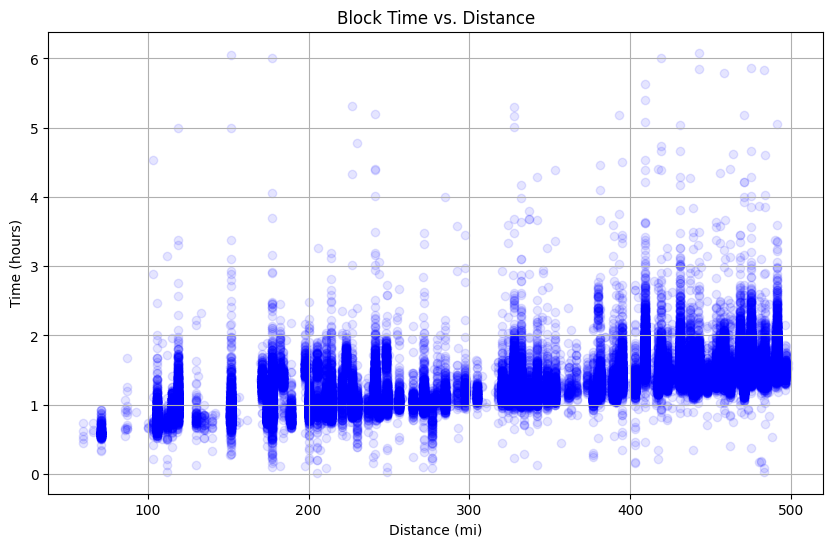

In [45]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DISTANCE IN MILES'], filtered_df['Average Actual Block Time'], color='blue', alpha=0.1)  # alpha is set for better visibility of point density
plt.title('Block Time vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

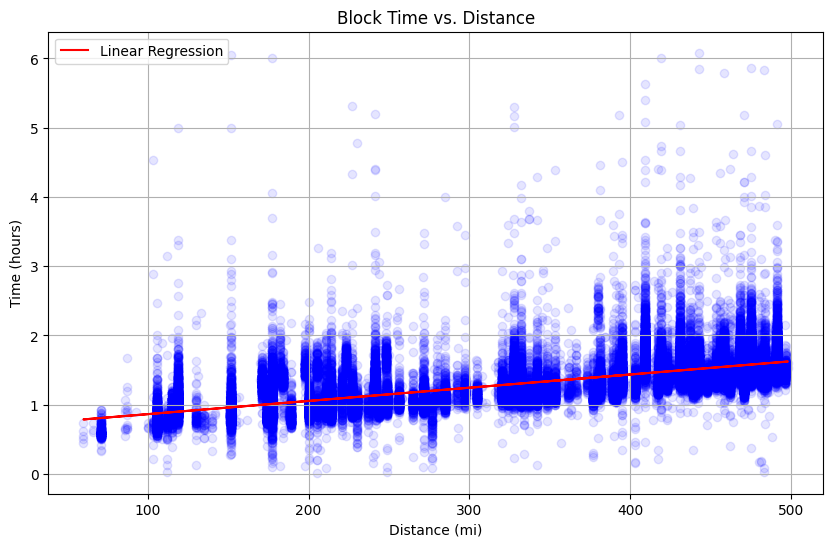

In [46]:
# Perform linear regression
slope, intercept = np.polyfit(filtered_df['DISTANCE IN MILES'], filtered_df['Average Actual Block Time'], 1)
regression_line = slope * filtered_df['DISTANCE IN MILES'] + intercept

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DISTANCE IN MILES'], filtered_df['Average Actual Block Time'], color='blue', alpha=0.1)  # alpha set for better visibility
plt.plot(filtered_df['DISTANCE IN MILES'], regression_line, color='red', label='Linear Regression')  # Plot regression line
plt.title('Block Time vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Time (hours)')
plt.legend()
plt.grid(True)
plt.show()

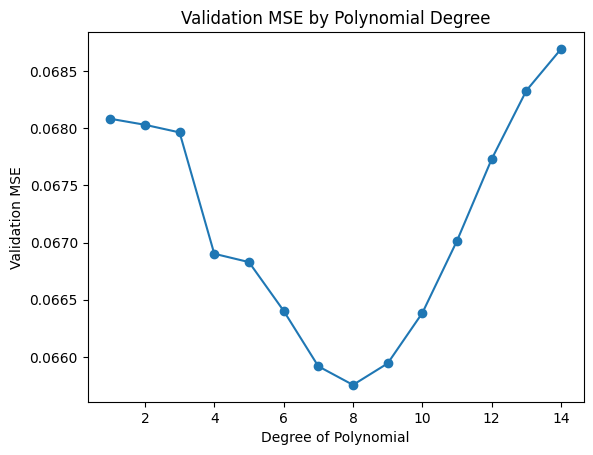

Best polynomial degree: 8


In [47]:
# Prepare data
X = filtered_df['DISTANCE IN MILES'].values.reshape(-1, 1)
y = filtered_df['Average Actual Block Time'].values



# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Test different degrees
degrees = range(1, 15)
validation_scores = []
models = []
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred)
    validation_scores.append(score)
    models.append(model)

# Plot validation scores
plt.plot(degrees, validation_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Validation MSE')
plt.title('Validation MSE by Polynomial Degree')
plt.show()

# Choose the model with the lowest validation MSE
best_degree = degrees[np.argmin(validation_scores)]
best_model = models[np.argmin(validation_scores)]
print("Best polynomial degree:", best_degree)

In [48]:
validation_scores

[np.float64(0.06808306662006706),
 np.float64(0.06803035216957472),
 np.float64(0.0679635283364696),
 np.float64(0.06690203127561052),
 np.float64(0.0668290680339262),
 np.float64(0.06640335980226805),
 np.float64(0.06591761358885498),
 np.float64(0.06575456860126246),
 np.float64(0.06594307258812125),
 np.float64(0.06638436710142079),
 np.float64(0.06701632288545663),
 np.float64(0.06773124431105872),
 np.float64(0.068330135690583),
 np.float64(0.06869392502802059)]

Polynomial coefficients: [ 5.41360931e-19 -1.11636282e-15  9.59792617e-13 -4.47184866e-10
  1.22700431e-07 -2.00565727e-05  1.85218441e-03 -7.97929939e-02
  1.66786777e+00]
Training MSE: 0.06767132316231501, Test MSE: 0.06571976697212337


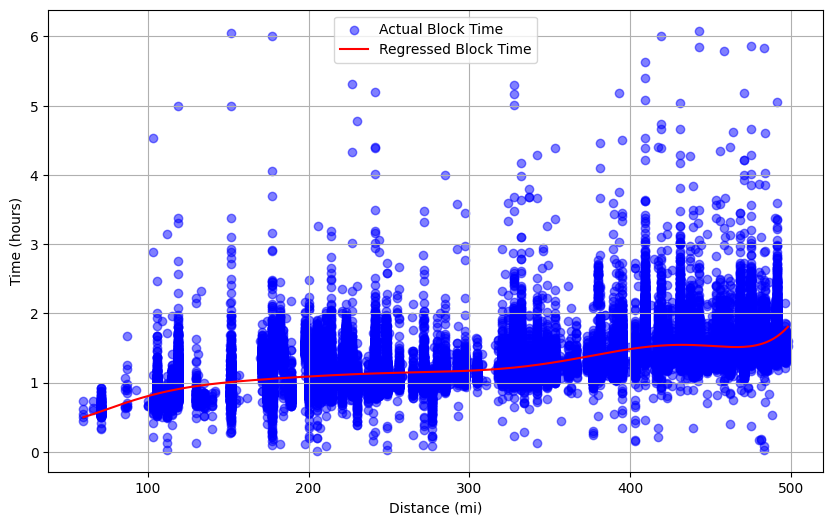

/tmp/ipykernel_24477/2010032849.py:44: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(X_train[:m], y_train[:m], degree)


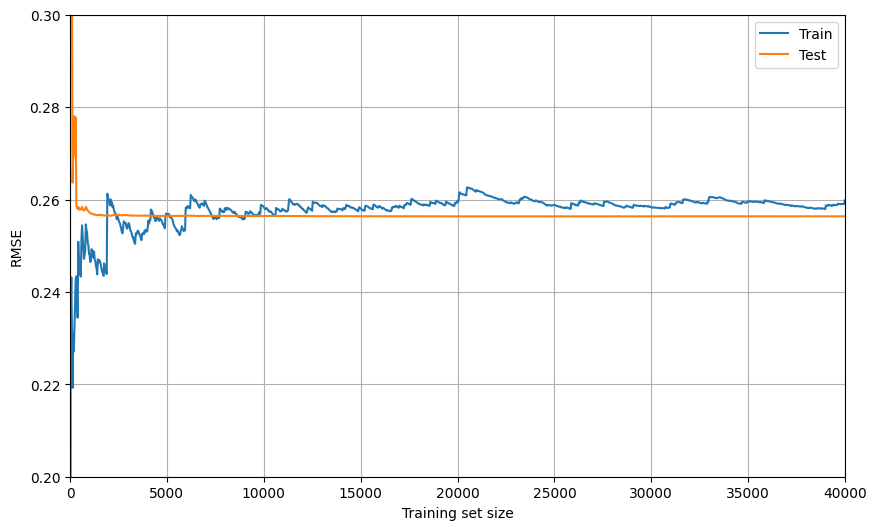

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_df['DISTANCE IN MILES'], filtered_df['Average Actual Block Time'], test_size=0.2, random_state=42)

# Fit a polynomial regression
degree = 8  # Degree can be adjusted based on how well you need the curve to fit
coefficients = np.polyfit(X_train, y_train, degree)
polynomial = np.poly1d(coefficients)

# Print the coefficients of the polynomial regression
print("Polynomial coefficients:", coefficients)

# Generate predicted y-values for training and testing sets
y_train_pred = polynomial(X_train)
y_test_pred = polynomial(X_test)

# Calculate and print the training and testing errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")

# Generate predicted y-values using the polynomial for plotting
x_values = np.linspace(min(filtered_df['DISTANCE IN MILES']), max(filtered_df['DISTANCE IN MILES']), 400)
y_values = polynomial(x_values)

# Plotting the scatter plot and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DISTANCE IN MILES'], filtered_df['Average Actual Block Time'], color='blue', alpha=0.5, label='Actual Block Time')
plt.plot(x_values, y_values, color='red', label='Regressed Block Time')
plt.xlabel('Distance (mi)')
plt.ylabel('Time (hours)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting learning curves with incremental steps
train_errors = []
test_errors = []

# Define increments for training sizes
increments = np.linspace(1, len(X_train), 2000, dtype=int)

for m in increments:
    coefficients = np.polyfit(X_train[:m], y_train[:m], degree)
    polynomial = np.poly1d(coefficients)

    y_train_pred = polynomial(X_train[:m])
    y_test_pred = polynomial(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.plot(increments, np.sqrt(train_errors), label='Train')
plt.plot(increments, np.sqrt(test_errors), label='Test')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.xlim(0, 40000)  # Adjust this value to zoom in on the region of interest
plt.ylim(0.2, 0.3)  # Adjust this value to better see the differences
plt.show()



In [50]:
# Save coefficients to a file
with open('/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Regression/polynomial_blockTime_coefficients.pkl', 'wb') as file:
    pickle.dump(coefficients, file)

In [51]:
# Load coefficients from the file
with open('/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Regression/polynomial_blockTime_coefficients.pkl', 'rb') as file:
    loaded_coefficients = pickle.load(file)

loaded_coefficients

array([ 5.41360931e-19, -1.11636282e-15,  9.59792617e-13, -4.47184866e-10,
        1.22700431e-07, -2.00565727e-05,  1.85218441e-03, -7.97929939e-02,
        1.66786777e+00])

     Distance (miles)  Predicted Block Time (hours)
0                  50                      0.442886
1                  51                      0.447147
2                  52                      0.451798
3                  53                      0.456813
4                  54                      0.462167
..                ...                           ...
446               496                      1.759656
447               497                      1.782866
448               498                      1.807615
449               499                      1.833972
450               500                      1.862007

[451 rows x 2 columns]


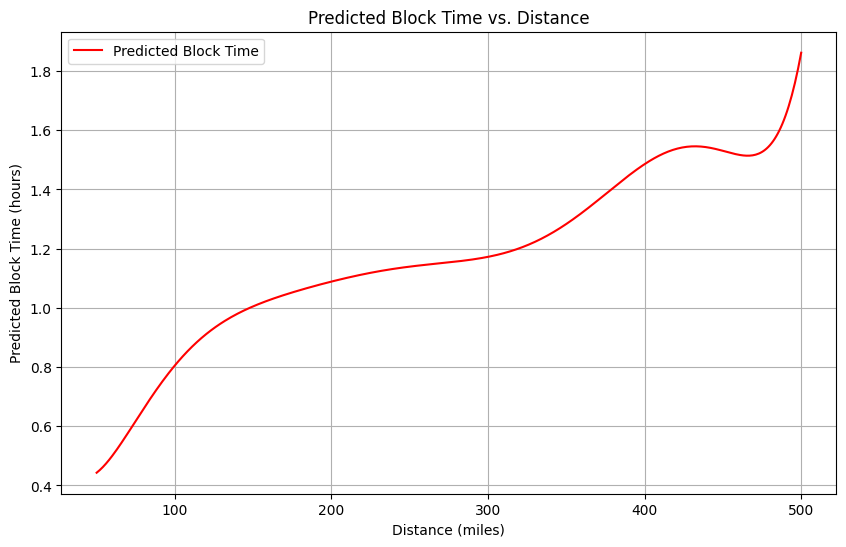

In [52]:
# coefficients = [5.41360931e-19, -1.11636282e-15,  9.59792617e-13, -4.47184866e-10,
#   1.22700431e-07, -2.00565727e-05,  1.85218441e-03, -7.97929939e-02,
#   1.66786777e+00]  # From above output

# Create a range of distances from 50 to 500 miles
distances = np.arange(50, 501, 1)  # Points from 50 to 500

# Predict the block times using the polynomial coefficients
predicted_block_times = np.polyval(loaded_coefficients, distances)

# Create a DataFrame with the distances and the predicted block times
df_predictions = pd.DataFrame({
    'Distance (miles)': distances,
    'Predicted Block Time (hours)': predicted_block_times
})

# Display the DataFrame
print(df_predictions)

# Plotting the results for visualization
plt.figure(figsize=(10, 6))
plt.plot(df_predictions['Distance (miles)'], df_predictions['Predicted Block Time (hours)'], color='red', label='Predicted Block Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Predicted Block Time (hours)')
plt.title('Predicted Block Time vs. Distance')
plt.legend()
plt.grid(True)
plt.show()

# Travel time for Ground Transportation

In [53]:
df=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/DistanceAndTimeRTN.csv")
df

,Origin,Destination,Distance,Time
0,BNA,MEM,222 mi,3 hours 23 mins
1,BNA,CHA,136 mi,2 hours 15 mins
2,BNA,TRI,272 mi,4 hours 2 mins
3,BNA,TYS,175 mi,2 hours 38 mins
4,BNA,16860,125 mi,2 hours 1 min
...,...,...,...,...
267,RTN2,28940,256 mi,3 hours 53 mins
268,RTN2,32820,132 mi,2 hours 3 mins
269,RTN2,34100,302 mi,4 hours 38 mins
270,RTN2,34980,101 mi,1 hour 36 mins


In [54]:
df.drop(columns=['Origin', 'Destination'], inplace=True)
df.head()

,Distance,Time
0,222 mi,3 hours 23 mins
1,136 mi,2 hours 15 mins
2,272 mi,4 hours 2 mins
3,175 mi,2 hours 38 mins
4,125 mi,2 hours 1 min


In [55]:
# Function to convert time string to total minutes
def time_to_minutes(time_str):
    parts = time_str.split()
    hours = 0
    minutes = 0
    for i in range(0, len(parts), 2):
        if 'hour' in parts[i+1]:
            hours = int(parts[i])
        elif 'min' in parts[i+1]:
            minutes = int(parts[i])
    return hours * 60 + minutes

# Apply the function to the 'Time' column
df['Time'] = df['Time'].apply(time_to_minutes)

# Remove 'mi' from 'Distance' and convert to numeric
df['Distance'] = df['Distance'].str.replace(' mi', '').astype(float)

# Display the updated DataFrame
df

,Distance,Time
0,222.0,203
1,136.0,135
2,272.0,242
3,175.0,158
4,125.0,121
...,...,...
267,256.0,233
268,132.0,123
269,302.0,278
270,101.0,96


In [56]:
# Filter the DataFrame to include only distances of 500 miles or less
df = df[(df['Distance'] > 50) & (df['Distance'] < 500) ].copy()
df['Time']= df['Time']/60

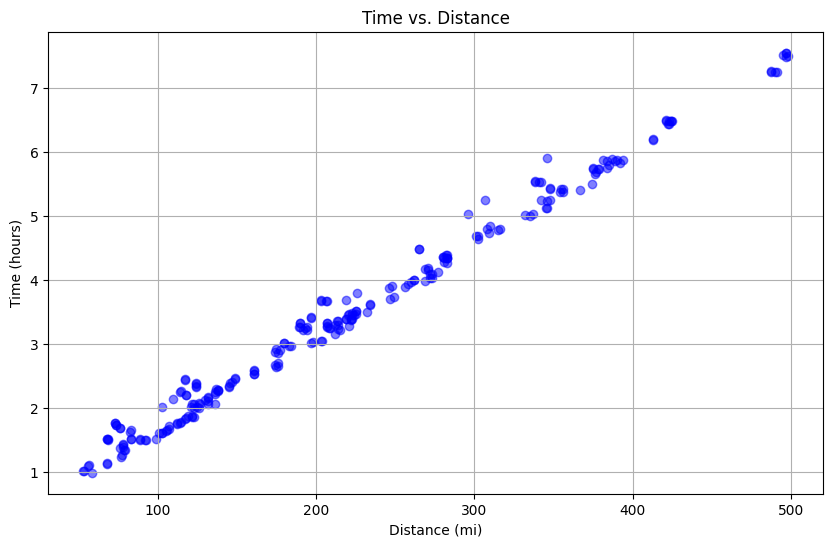

In [57]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Time'], color='blue', alpha=0.5)  # alpha is set for better visibility of point density
plt.title('Time vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

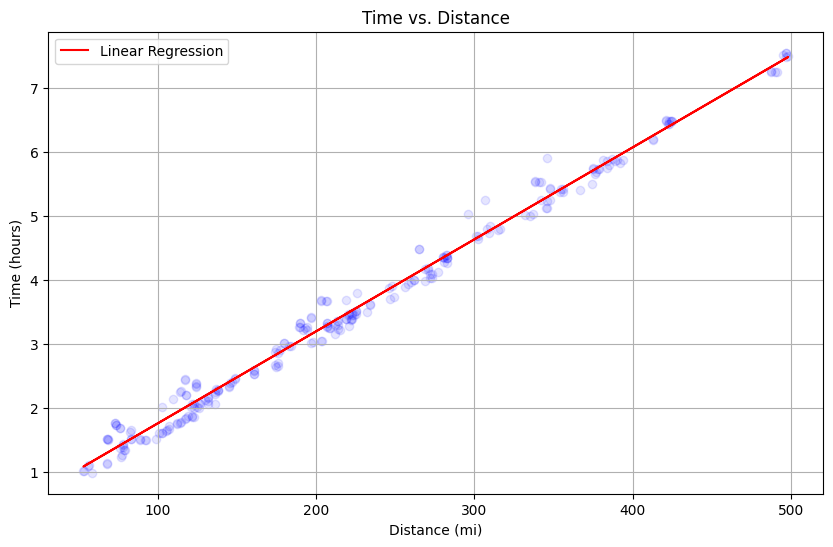

In [58]:
# Perform linear regression
slope, intercept = np.polyfit(df['Distance'], df['Time'], 1)
regression_line = slope * df['Distance'] + intercept

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Time'], color='blue', alpha=0.1)  # alpha set for better visibility
plt.plot(df['Distance'], regression_line, color='red', label='Linear Regression')  # Plot regression line
plt.title('Time vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Time (hours)')
plt.legend()
plt.grid(True)
plt.show()

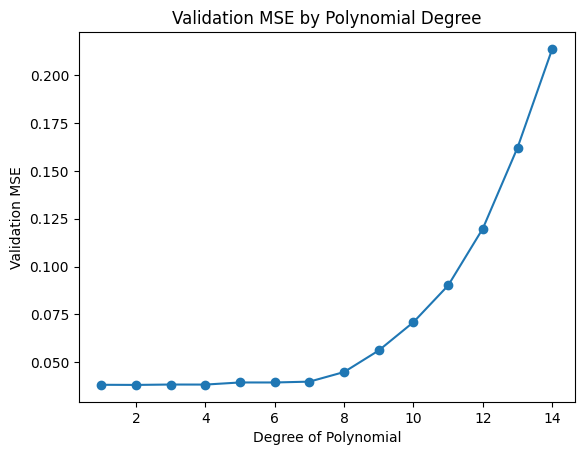

Best polynomial degree: 2


In [59]:
# Prepare data
X = df['Distance'].values.reshape(-1, 1)
y = df['Time'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Test different degrees
degrees = range(1, 15)
validation_scores = []
models = []
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred)
    validation_scores.append(score)
    models.append(model)

# Plot validation scores
plt.plot(degrees, validation_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Validation MSE')
plt.title('Validation MSE by Polynomial Degree')
plt.show()

# Choose the model with the lowest validation MSE
best_degree = degrees[np.argmin(validation_scores)]
best_model = models[np.argmin(validation_scores)]
print("Best polynomial degree:", best_degree)

In [60]:
validation_scores

[np.float64(0.038230526804656516),
 np.float64(0.038159990873864715),
 np.float64(0.03836779821127125),
 np.float64(0.038341487973821836),
 np.float64(0.039443557240262),
 np.float64(0.03943927903315842),
 np.float64(0.03987364873193851),
 np.float64(0.04490590733510717),
 np.float64(0.0561920169376896),
 np.float64(0.07097862798917132),
 np.float64(0.09015207499019012),
 np.float64(0.11990727648345313),
 np.float64(0.16218700511129716),
 np.float64(0.2137575362054162)]

Polynomial coefficients: [4.11291889e-07 1.41786071e-02 3.36480518e-01]


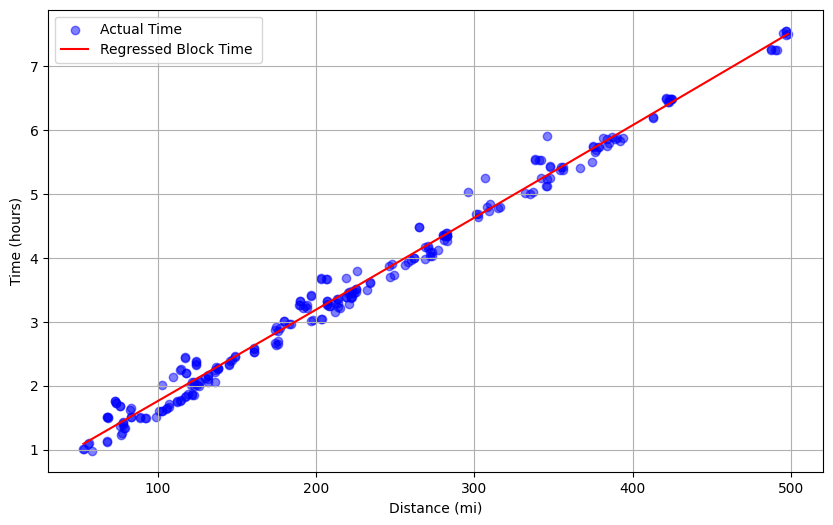

In [61]:
# Fit a polynomial regression
degree = 2  # Degree can be adjusted based on how well you need the curve to fit
coefficients = np.polyfit(df['Distance'], df['Time'], degree)
polynomial = np.poly1d(coefficients)

# Print the coefficients of the polynomial regression
print("Polynomial coefficients:", coefficients)

# Generate predicted y-values using the polynomial for plotting
x_values = np.linspace(min(df['Distance']), max(df['Distance']), 400)
y_values = polynomial(x_values)


# Plotting the scatter plot and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Time'], color='blue', alpha=0.5, label='Actual Time')
plt.plot(x_values, y_values, color='red', label='Regressed Block Time ')
# plt.title('Time vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Time (hours)')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Save coefficients to a file
with open('/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Regression/polynomial_groundTime_coefficients.pkl', 'wb') as file:
    pickle.dump(coefficients, file)

In [63]:
# Load coefficients from the file
with open('/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Regression/polynomial_groundTime_coefficients.pkl', 'rb') as file:
    loaded_coefficients = pickle.load(file)

loaded_coefficients

array([4.11291889e-07, 1.41786071e-02, 3.36480518e-01])

     Distance (miles)  Predicted Time (hours)
0                  50                1.046439
1                  51                1.060659
2                  52                1.074880
3                  53                1.089102
4                  54                1.103325
..                ...                     ...
446               496                7.470254
447               497                7.484841
448               498                7.499429
449               499                7.514018
450               500                7.528607

[451 rows x 2 columns]


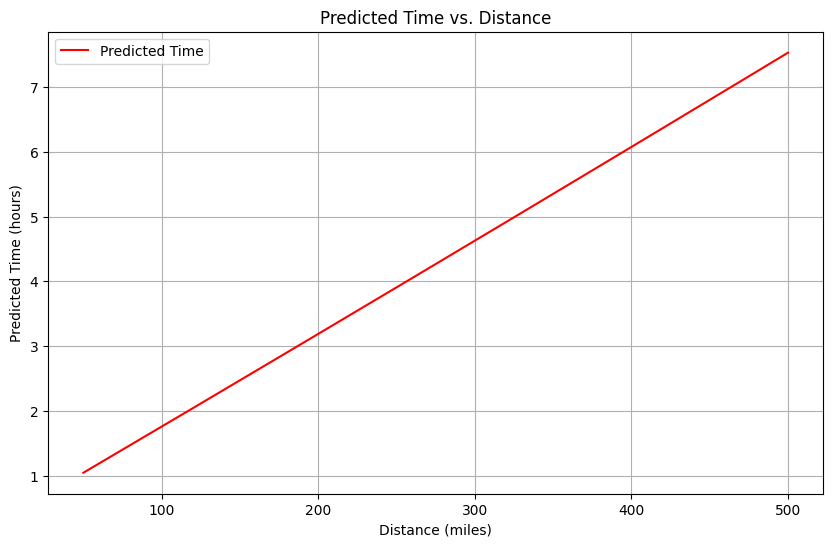

In [64]:
# coefficients = [-5.85006412e-07,  1.47577238e-02,  2.65628425e-01]  # From above output

# Create a range of distances from 50 to 500 miles
distances = np.arange(50, 501, 1)  # Points from 50 to 500

# Predict the block times using the polynomial coefficients
predicted_block_times = np.polyval(loaded_coefficients, distances)

# Create a DataFrame with the distances and the predicted block times
df_predictions_Ground = pd.DataFrame({
    'Distance (miles)': distances,
    'Predicted Time (hours)': predicted_block_times
})

# Display the DataFrame
print(df_predictions_Ground)

# Plotting the results for visualization
plt.figure(figsize=(10, 6))
plt.plot(df_predictions_Ground['Distance (miles)'], df_predictions_Ground['Predicted Time (hours)'], color='red', label='Predicted Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Predicted Time (hours)')
plt.title('Predicted Time vs. Distance')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
df_predictions

,Distance (miles),Predicted Block Time (hours)
0,50,0.442886
1,51,0.447147
2,52,0.451798
3,53,0.456813
4,54,0.462167
...,...,...
446,496,1.759656
447,497,1.782866
448,498,1.807615
449,499,1.833972


In [66]:
# Merge the two DataFrames on the common column 'Distance (miles)'
merged_df = pd.merge(df_predictions, df_predictions_Ground, on='Distance (miles)', how='inner')

# Display the merged DataFrame
merged_df

,Distance (miles),Predicted Block Time (hours),Predicted Time (hours)
0,50,0.442886,1.046439
1,51,0.447147,1.060659
2,52,0.451798,1.074880
3,53,0.456813,1.089102
4,54,0.462167,1.103325
...,...,...,...
446,496,1.759656,7.470254
447,497,1.782866,7.484841
448,498,1.807615,7.499429
449,499,1.833972,7.514018


In [67]:
# merged_df.to_csv("/content/drive/MyDrive/NASA-Project/Dataset/Tennessee/Time/Final_TimeRTN.csv", index=False)